<a href="https://colab.research.google.com/github/antoniogss/WBGAPI/blob/main/economy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook imports and packages

In [ ]:
import pandas as pd
import numpy as np
import warnings as war
import google.colab as gc
import matplotlib.pyplot as plt

from pandas_datareader import wb

!pip install geopandas mapclassify
import geopandas
import mapclassify
gc.output.clear()

#Google Drive connection

In [ ]:
gc.drive.mount('./gdrive/', 
               force_remount=True
              )
gc.output.clear()

#Work directory

In [ ]:
%cd ./gdrive/MyDrive/processos_industriais_2/

/content/gdrive/MyDrive/processos_industriais_2


#WBGAPI

WBGAPI provides modern, pythonic access to the World Bank's data API. It is designed both for data novices and data scientist types.

source: https://pypi.org/project/wbgapi/

In [ ]:
!pip install wbgapi
gc.output.clear()

import wbgapi as wb

#Indexes

In [ ]:
# wb.series.info(q='industry')

In [ ]:
# wb.series.info(q='growth')

In [ ]:
"""	
0 - Industry (including construction), value added (annual % growth)
1 - Industry (including construction), value added (% of GDP)
2 - GDP growth (annual %)
"""
index = ['NV.IND.TOTL.KD.ZG','NV.IND.TOTL.ZS','NY.GDP.MKTP.KD.ZG'] #Series

#Time

In [ ]:
start = 1960
stop = 2022
step = 1
time = list(range(start,stop,step))

#Brazil

In [ ]:
wb.economy.info(q='Brazil')

id,value,region,incomeLevel
BRA,Brazil,LCN,UMC
,1 elements,,


In [ ]:
bra_0 = wb.data.DataFrame(index[0],
                        'BRA',
                        time
                        )

"""
reset the index and convert 
the index to a column
"""
bra_0.reset_index(inplace=True)

#Transpose 
bra_0 = bra_0.T

bra_0.rename(columns=bra_0.iloc[0], inplace = True)
bra_0.drop(bra_0.index[0], inplace = True)
bra_0.reset_index(inplace=True)
bra_0 = bra_0.rename(columns = {'index':'Year'})

bra_0.rename(columns={'BRA':'Industry (annual % growth)'},
               inplace = True
            )

bra_0.replace({'YR' : ' '}, regex = True, inplace = True)
bra_0['Industry (annual % growth)'] = bra_0['Industry (annual % growth)'] .astype(float)
bra_0['Year'] = bra_0['Year'].astype(int)

####

bra_1 = wb.data.DataFrame(index[1],
                        'BRA',
                        time
                        )

"""
reset the index and convert 
the index to a column
"""
bra_1.reset_index(inplace=True)

#Transpose 
bra_1 = bra_1.T

bra_1.rename(columns=bra_1.iloc[0], inplace = True)
bra_1.drop(bra_1.index[0], inplace = True)
bra_1.reset_index(inplace=True)
bra_1 = bra_1.rename(columns = {'index':'Year'})

bra_1.rename(columns={'BRA':'Industry (% of GDP)'},
               inplace = True
            )

bra_1.replace({'YR' : ' '}, regex = True, inplace = True)
bra_1['Industry (% of GDP)'] = bra_1['Industry (% of GDP)'] .astype(float)
bra_1['Year'] = bra_1['Year'].astype(int)

####

bra_2 = wb.data.DataFrame(index[2],
                          'BRA',
                          time
                         )

"""
reset the index and convert 
the index to a column
"""
bra_2.reset_index(inplace=True)

#Transpose 
bra_2 = bra_2.T

bra_2.rename(columns=bra_2.iloc[0], inplace = True)
bra_2.drop(bra_2.index[0], inplace = True)
bra_2.reset_index(inplace=True)
bra_2 = bra_2.rename(columns = {'index':'Year'})

bra_2.rename(columns={'BRA':'GDP growth (annual %)'},
               inplace = True
              )

bra_2.replace({'YR' : ' '}, regex = True, inplace = True)
bra_2['GDP growth (annual %)'] = bra_2['GDP growth (annual %)'] .astype(float)
bra_2['Year'] = bra_2['Year'].astype(int)

####

bra_01 = bra_0.merge(bra_1, 
                     how = 'outer'
                    )

bra = bra_01.merge(bra_2, 
                     how = 'outer'
                    )

bra.head()

,Year,Industry (annual % growth),Industry (% of GDP),GDP growth (annual %)
0,1960,NaN,28.318018,NaN
1,1961,NaN,32.283402,8.6
2,1962,NaN,30.918540,6.6
3,1963,NaN,34.369521,0.6
4,1964,NaN,32.404340,3.4


#World

In [ ]:
wb.economy.info(q='European')

id,value,region,incomeLevel
EUU,European Union,,
,1 elements,,


In [ ]:
wld_0 = wb.data.DataFrame(index[0],
                        'WLD',
                        time
                        )

"""
reset the index and convert 
the index to a column
"""
wld_0.reset_index(inplace=True)

#Transpose 
wld_0 = wld_0.T

wld_0.rename(columns=wld_0.iloc[0], inplace = True)
wld_0.drop(wld_0.index[0], inplace = True)
wld_0.reset_index(inplace=True)
wld_0 = wld_0.rename(columns = {'index':'Year'})

wld_0.rename(columns={'WLD':'Industry (annual % growth)'},
               inplace = True
              )

wld_0.replace({'YR' : ' '}, regex = True, inplace = True)
wld_0['Industry (annual % growth)'] = wld_0['Industry (annual % growth)'].astype(float)
wld_0['Year'] = wld_0['Year'].astype(int)

####

wld_1 = wb.data.DataFrame(index[1],
                        'WLD',
                        time
                        )

"""
reset the index and convert 
the index to a column
"""
wld_1.reset_index(inplace=True)

#Transpose 
wld_1 = wld_1.T

wld_1.rename(columns=wld_1.iloc[0], inplace = True)
wld_1.drop(wld_1.index[0], inplace = True)
wld_1.reset_index(inplace=True)
wld_1 = wld_1.rename(columns = {'index':'Year'})

wld_1.rename(columns={'WLD':'Industry (% of GDP)'},
               inplace = True
              )

wld_1.replace({'YR' : ' '}, regex = True, inplace = True)
wld_1['Industry (% of GDP)'] = wld_1['Industry (% of GDP)'] .astype(float)
wld_1['Year'] = wld_1['Year'].astype(int)

####

wld_2 = wb.data.DataFrame(index[2],
                        'WLD',
                        time
                        )

"""
reset the index and convert 
the index to a column
"""
wld_2.reset_index(inplace=True)

#Transpose 
wld_2 = wld_2.T

wld_2.rename(columns=wld_2.iloc[0], inplace = True)
wld_2.drop(wld_2.index[0], inplace = True)
wld_2.reset_index(inplace=True)
wld_2 = wld_2.rename(columns = {'index':'Year'})

wld_2.rename(columns={'WLD':'GDP growth (annual %)'},
               inplace = True
              )

wld_2.replace({'YR' : ' '}, regex = True, inplace = True)
wld_2['GDP growth (annual %)'] = wld_2['GDP growth (annual %)'] .astype(float)
wld_2['Year'] = wld_2['Year'].astype(int)

####

wld_01 = wld_0.merge(wld_1, 
                     how = 'outer'
                    )

wld = wld_01.merge(wld_2, 
                     how = 'outer'
                    )

wld.head()

,Year,Industry (annual % growth),Industry (% of GDP),GDP growth (annual %)
0,1960,NaN,NaN,NaN
1,1961,NaN,NaN,3.801050
2,1962,NaN,NaN,5.320367
3,1963,NaN,NaN,5.192490
4,1964,NaN,NaN,6.568662


#Graphs

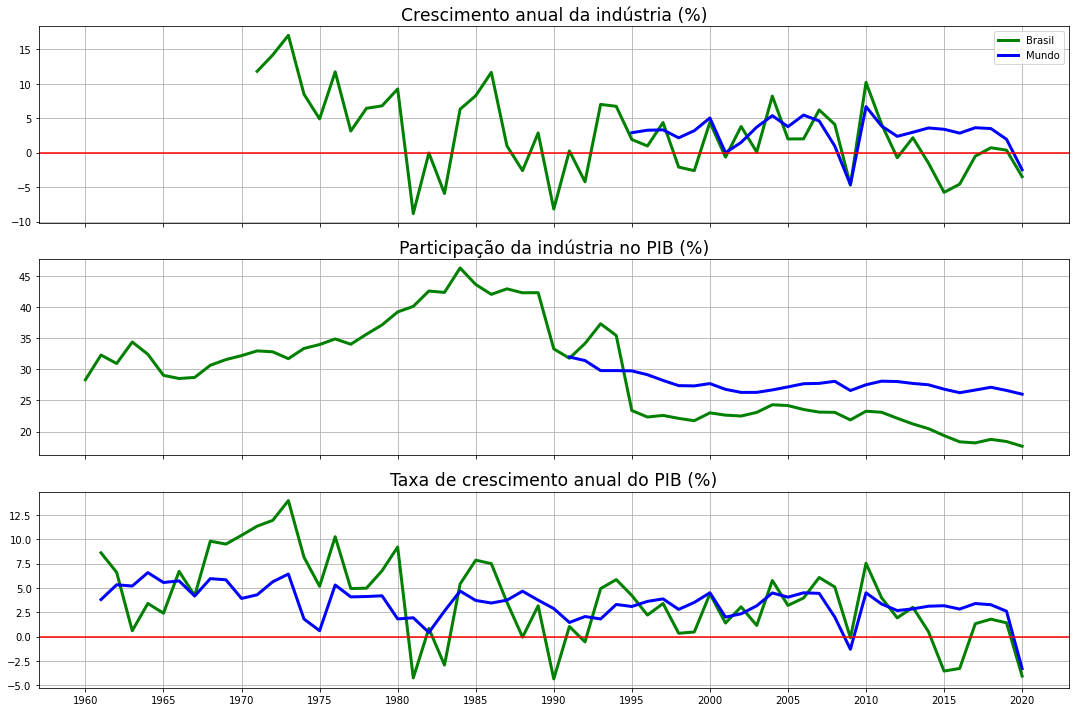

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, 
                                         ncols=1, 
                                         sharex=True,
                                        #  sharey=True, 
                                         figsize=(15,10)
                                        )

x = time
y1 = bra['Industry (annual % growth)']
y2 = wld['Industry (annual % growth)']
y3 = bra['Industry (% of GDP)']
y4 = wld['Industry (% of GDP)']
y5 = bra['GDP growth (annual %)']
y6 = wld['GDP growth (annual %)']

ax1.plot(x,y1,color='green',label='Brasil',linewidth=3)
ax1.plot(x,y2,color='blue',label='Mundo',linewidth=3)
ax1.axhline(y = 0, color = 'red', linestyle = '-')
ax2.plot(x,y3,color='green',label='Brasil',linewidth=3)
ax2.plot(x,y4,color='blue',label='Mundo',linewidth=3)
ax3.plot(x,y5,color='green',label='Brasil',linewidth=3)
ax3.plot(x,y6,color='blue',label='Mundo',linewidth=3)
ax3.axhline(y = 0, color = 'red', linestyle = '-')

ax1.legend()
ax1.set_title('Crescimento anual da indústria (%)',
              fontsize='xx-large'
              )
# ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(True)

# ax2.legend()
ax2.set_title('Participação da indústria no PIB (%)',
              fontsize='xx-large'
              )
# ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(True)

# ax3.legend()
ax3.set_title('Taxa de crescimento anual do PIB (%)',
              fontsize='xx-large'
              )
# ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(True)

plt.xticks(np.arange(min(x), max(x), 5))

plt.savefig('dados_ind.png', 
            dpi = 500, #dpi = dots per inch
            bbox_to_anchor=(1.05,1), 
            loc='upper left', 
            bbox_inches='tight'
          )

plt.tight_layout()
plt.show()

#Countries

In [ ]:
paises = ['BRA', 'CHN', 'EUU', 'USA']

paises = wb.data.DataFrame(index[1],
                       paises,
                       time,
                       labels=True
                       )

paises.reset_index(drop=True, inplace=True)
paises = paises.T
paises.rename(columns=paises.iloc[0], inplace = True)
paises.drop(paises.index[0], inplace = True)
paises.reset_index(inplace=True)
paises = paises.rename(columns = {'index':'Year'})
paises = paises.replace({'YR' : ' '}, regex = True)

x_paises = ['Brazil', 'China', 'European Union', 'United States']
paises[x_paises] = paises[x_paises].apply(pd.to_numeric, axis = 1)
paises['Year'] = paises['Year'].astype(int)

paises.rename(columns = {'United States':'Estados Unidos', 
                         'European Union':'União Europeia',
                         'Brazil':'Brasil'},
              inplace = True
             )

paises.head()

,Year,Estados Unidos,União Europeia,China,Brasil
0,1960,NaN,NaN,44.391538,28.318018
1,1961,NaN,NaN,31.932159,32.283402
2,1962,NaN,NaN,31.311306,30.918540
3,1963,NaN,NaN,33.068974,34.369521
4,1964,NaN,NaN,35.328934,32.404340


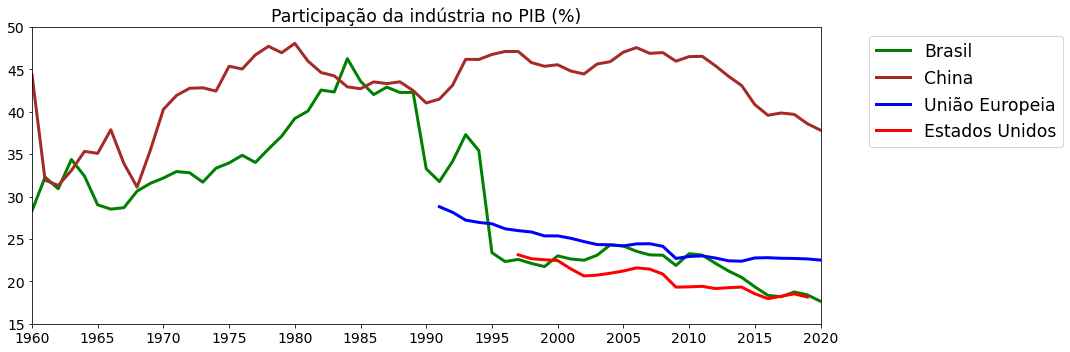

In [ ]:
x = time
y1 = paises['Brasil']
y2 = paises['China']
y3 = paises['União Europeia']
y4 = paises['Estados Unidos']

plt.figure(figsize=(15,5))
plt.plot(x,y1,color='green',label='Brasil',linewidth=3)
plt.plot(x,y2,color='brown',label='China',linewidth=3)
plt.plot(x,y3,color='blue',label='União Europeia',linewidth=3)
plt.plot(x,y4,color='red',label='Estados Unidos',linewidth=3)

plt.xlim(start,stop-4)
plt.ylim(15,50)
plt.xticks(range(start, stop-3),
           fontsize=14,
          #  rotation=90
           )
plt.yticks(fontsize=14)
plt.title('Participação da indústria no PIB (%)',
          fontsize='xx-large'
          )
plt.legend(bbox_to_anchor=(1.05,1), 
           loc='upper left', 
           fontsize='xx-large',
          )
plt.ticklabel_format(style='plain')    # to prevent scientific notation.

plt.xticks(np.arange(min(x), max(x), 5))

plt.savefig('paises_ind.png', dpi = 500, #dpi = dots per inch
            bbox_to_anchor=(1.05,1), 
            loc='upper left', 
            bbox_inches='tight'
          ) 

plt.tight_layout() #tight margins
plt.show()

#Map

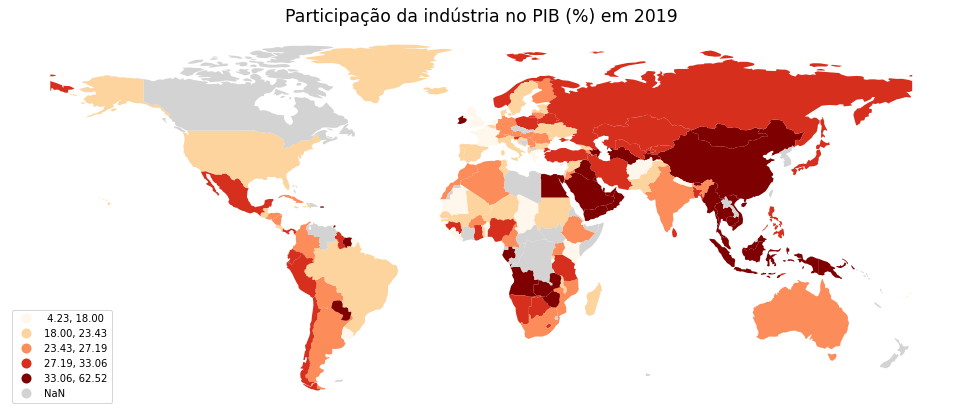

In [ ]:
data = wb.download(indicator=index[1],
                   country='all',
                   start=2019,
                   end=2019
                  )

data = data.reset_index(1)
data.columns = ['year','Industry (% of GDP)']
data[['Industry (% of GDP)']] = data[['Industry (% of GDP)']].apply(pd.to_numeric)
map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map = map[map['name'] != 'Antarctica'] #excluding Antarctica for visual purposes
map = map.set_index('name')

index_change = {'United States of America': 'United States',
                'Yemen': 'Yemen, Rep.',
                'Venezuela': 'Venezuela, RB',
                'Syria': 'Syrian Arab Republic',
                'Solomon Is.': 'Solomon Islands',
                'Russia': 'Russian Federation',
                'Iran': 'Iran, Islamic Rep.',
                'Gambia': 'Gambia, The',
                'Kyrgyzstan': 'Kyrgyz Republic',
                'Mauritania': 'Mauritius',
                'Egypt': 'Egypt, Arab Rep.'}

map = map.rename(index=index_change)
map = map.join(data, how='outer')
map.plot('Industry (% of GDP)',
          cmap='OrRd', 
          scheme='quantiles', 
          missing_kwds={"color": "lightgrey"}, 
          legend=True, 
          legend_kwds={'loc': 'lower left'}, 
          figsize=(18,7)
        )

plt.title('Participação da indústria no PIB (%) em 2019',
          fontsize='xx-large'
          )

plt.axis('off')

plt.savefig('map_ind.png', dpi = 200)

plt.show()